In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [8]:
df.shape

(2000, 2)

In [10]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [16]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

## Text Preprocessing

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [33]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maheesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Maheesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maheesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [41]:
df['cleaned_text']= df['Data'].apply(clean_text)
df['cleaned_text'].head()

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: cleaned_text, dtype: object

In [43]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
vectorizer= TfidfVectorizer()
x= vectorizer.fit_transform(df['cleaned_text'])
print(x.shape)

(2000, 46006)


## Naive Baye's modeling

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [50]:
x_train,x_test,y_train,y_test= train_test_split(x,df['Labels'],test_size=0.2,random_state=42)  # splitting dataset

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 46006)
(400, 46006)
(1600,)
(400,)


In [54]:
nb_model= MultinomialNB()  # implementing Naive's bayes
nb_model.fit(x_train,y_train)

MultinomialNB()

In [58]:
y_pred= nb_model.predict(x_test)  # predicting model
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'talk.politics.misc', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt', 'sci.crypt',
       'rec.sport.baseball', 'rec.autos', 'alt.atheism',
       'rec.sport.baseball', 'rec.sport.hockey', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.hockey', 'comp.sys.mac.hardware',
       'sci.med', 'sci.electronics', 'rec.sport.hockey',
       'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christian', '

In [62]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.84

In [66]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.88      0.88      0.88        17
         

## Sentiment Analysis

In [69]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
nltk.download('movie_reviews')
from textblob import TextBlob

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Maheesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [73]:
def get_sentiment(text):
    blob= TextBlob(text)
    if blob.sentiment.polarity>0:
        return 'positive'
    elif blob.sentiment.polarity<0:
        return 'negative'
    else:
        return 'neutral'

In [75]:
df['sentiment']= df['cleaned_text'].apply(get_sentiment)
print(df[['Data','sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


## Model Evaluation

In [80]:
def get_sentiment(text):
    blob= TextBlob(text)
    polarity= blob.sentiment.polarity
    if polarity>0:
        return 'Positive'
    elif polarity<0:
        return 'Negative'
    else:
        return 'Neutral'

In [86]:
df['Sentiment']= df['Data'].apply(get_sentiment)
print(df[['Data','Sentiment']].head())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [87]:
sentiment_distribution= df.groupby(['Labels','Sentiment']).size().unstack().fillna(0)
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


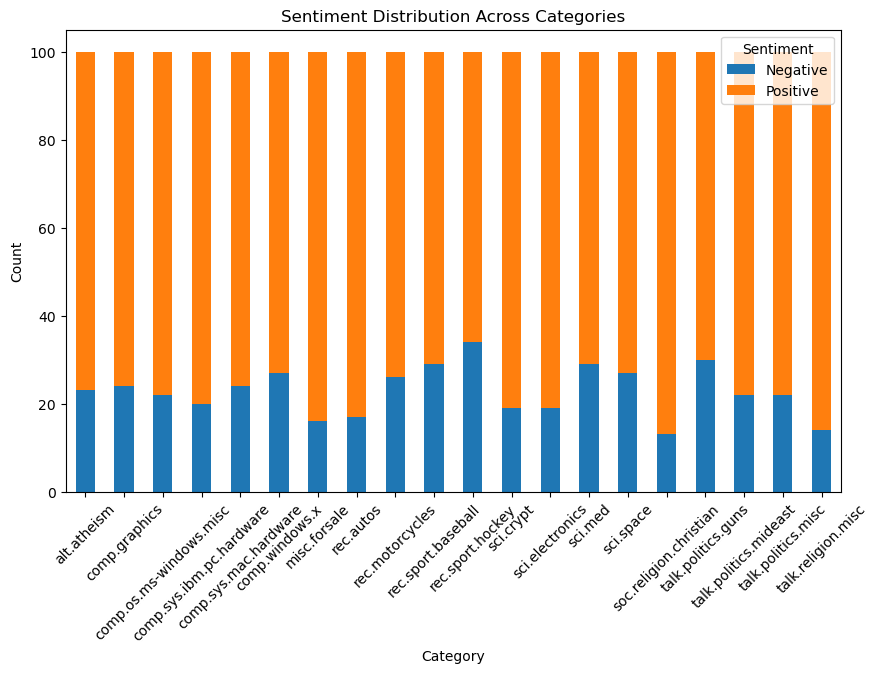

In [90]:
sentiment_distribution.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [92]:
accuracy

0.84